# Prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
home_team = pd.read_csv("X_Train_Data/train_home_team_statistics_df.csv")
away_team = pd.read_csv("X_Train_Data/train_away_team_statistics_df.csv")

#les fichiers de test
test_home_team = pd.read_csv("X_Test_Data/test_home_team_statistics_df.csv")
test_away_team = pd.read_csv("X_Test_Data/test_away_team_statistics_df.csv")

#les résultats cibles
y_test_random = pd.read_csv("Y_test_random_sEE2QeA.csv")

In [3]:
home_team.head()

,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match

In [4]:
away_team.head()

,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match

In [5]:
y_test_random.head()

,ID,HOME_WINS,DRAW,AWAY_WINS
0,12303,0,1,0
1,12304,0,1,0
2,12305,0,1,0
3,12306,0,1,0
4,12307,1,0,0


In [6]:
#pour comparer
home_team['type'] = 'HOME'
away_team['type'] = 'AWAY'
test_home_team['type'] = 'HOME'
test_away_team['type'] = 'AWAY'

In [7]:
#on concatene
X_train = pd.concat([home_team, away_team], ignore_index=True)
X_test = pd.concat([test_home_team, test_away_team], ignore_index=True)

colonnes_exp = [
    'TEAM_GOALS_season_sum',
    'TEAM_SHOTS_TOTAL_season_sum',
    'TEAM_BALL_POSSESSION_season_average',
    'TEAM_ATTACKS_season_sum',
    'TEAM_DANGEROUS_ATTACKS_season_sum'
]

X_train = X_train[colonnes_exp]
X_test = X_test[colonnes_exp]

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Résultats pour l'entraînement
y_test_random = pd.concat([home_team[['TEAM_GAME_WON_season_sum', 'TEAM_GAME_DRAW_season_sum', 'TEAM_GAME_LOST_season_sum']],
                     away_team[['TEAM_GAME_WON_season_sum', 'TEAM_GAME_DRAW_season_sum', 'TEAM_GAME_LOST_season_sum']]],
                    ignore_index=True)





In [8]:
X_train.head()

,TEAM_GOALS_season_sum,TEAM_SHOTS_TOTAL_season_sum,TEAM_BALL_POSSESSION_season_average,TEAM_ATTACKS_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum
0,3.0,3.0,1.0,2.0,4.0
1,10.0,6.0,6.0,7.0,6.0
2,1.0,4.0,1.0,4.0,3.0
3,5.0,7.0,9.0,6.0,3.0
4,3.0,3.0,4.0,4.0,4.0


In [9]:
y_test_random.head()

,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum
0,1.0,6.0,10.0
1,8.0,4.0,1.0
2,1.0,2.0,8.0
3,6.0,10.0,0.0
4,2.0,9.0,4.0


In [10]:
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de y_test :", y_test_random.shape)
print("Dimensions de X_test :", X_test.shape)

Dimensions de X_train : (24606, 5)
Dimensions de y_test : (24606, 3)
Dimensions de X_test : (50736, 5)


In [11]:
# remplacer nan
y_test_random = y_test_random.fillna(0)

print("\n remplacement des NaN :")
print("y_test:\n", y_test_random.head())


 remplacement des NaN :
y_test:
    TEAM_GAME_WON_season_sum  TEAM_GAME_DRAW_season_sum  \
0                       1.0                        6.0   
1                       8.0                        4.0   
2                       1.0                        2.0   
3                       6.0                       10.0   
4                       2.0                        9.0   

   TEAM_GAME_LOST_season_sum  
0                       10.0  
1                        1.0  
2                        8.0  
3                        0.0  
4                        4.0  


# Arbre de Régression

Prédictions avec Arbre de Régression :
 [[1.13824885 4.7663949  7.61396668]
 [2.56985525 4.80585274 5.93014475]
 [8.49548329 2.91734417 1.51355014]
 [8.49548329 2.91734417 1.51355014]
 [3.73054662 4.90530547 4.86720257]
 [4.99498388 4.68434253 3.84844142]
 [1.13824885 4.7663949  7.61396668]
 [1.13824885 4.7663949  7.61396668]
 [1.8869258  4.83117393 6.66470357]
 [8.49548329 2.91734417 1.51355014]]


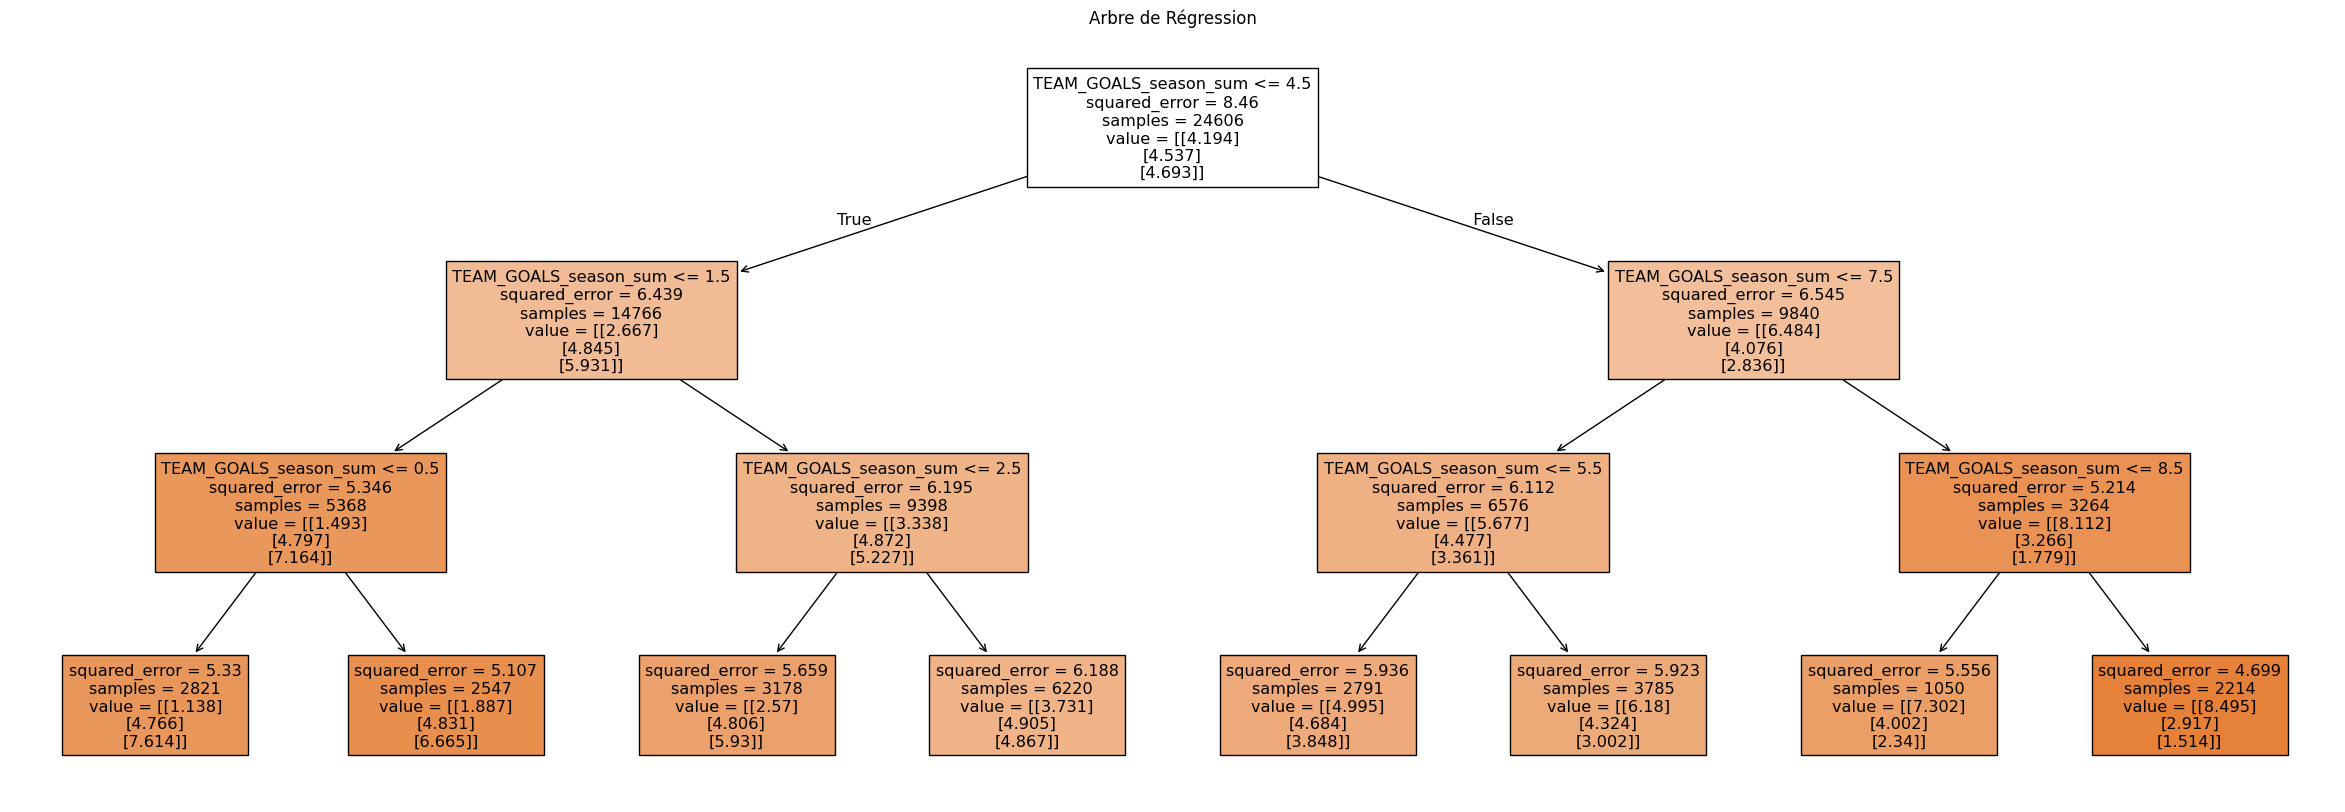

In [12]:
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_test_random)

# Prédictions avec l'arbre de régression
y_pred_regr = regr.predict(X_test)

# les premières prédictions
print("Prédictions avec Arbre de Régression :\n", y_pred_regr[:10])

# Visualiser l'arbre de régression
plt.figure(figsize=(30, 10))
plot_tree(regr, filled=True, feature_names=list(X_train.columns))
plt.title("Arbre de Régression")
plt.show()

Régression Linéaire (Resultat)

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_test_random)

# Prédictions avec la régression linéaire
y_pred_lin = lin_reg.predict(X_test)

# les 10 premières prédictions
print("\nPrédictions (Régression Linéaire - Limitées à 10) :\n", y_pred_lin[:10])

# Je vais converir  les prédictions en classes [1,0,0], [0,1,0], [0,0,1]
y_pred_classes = np.zeros_like(y_pred_lin)
y_pred_classes[np.arange(len(y_pred_lin)), y_pred_lin.argmax(axis=1)] = 1 

print("\nPrédictions Converties en Classes (Limitées à 10) :\n", y_pred_classes[:10])


Prédictions (Régression Linéaire - Limitées à 10) :
 [[1.75607059 5.0065285  6.60668798]
 [2.44999304 4.85792211 6.06781166]
 [8.55651374 3.64365483 1.19499795]
 [8.40161262 3.36439785 1.01811174]
 [3.98860396 4.97884086 5.25390295]
 [4.83375335 4.34096773 4.14154863]
 [0.7269184  5.14008418 7.47494458]
 [1.10598662 4.98742764 7.13390832]
 [1.77831939 5.04861264 6.62025977]
 [7.62075221 4.19830898 2.29453145]]

Prédictions Converties en Classes (Limitées à 10) :
 [[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


# Arbre de Classification

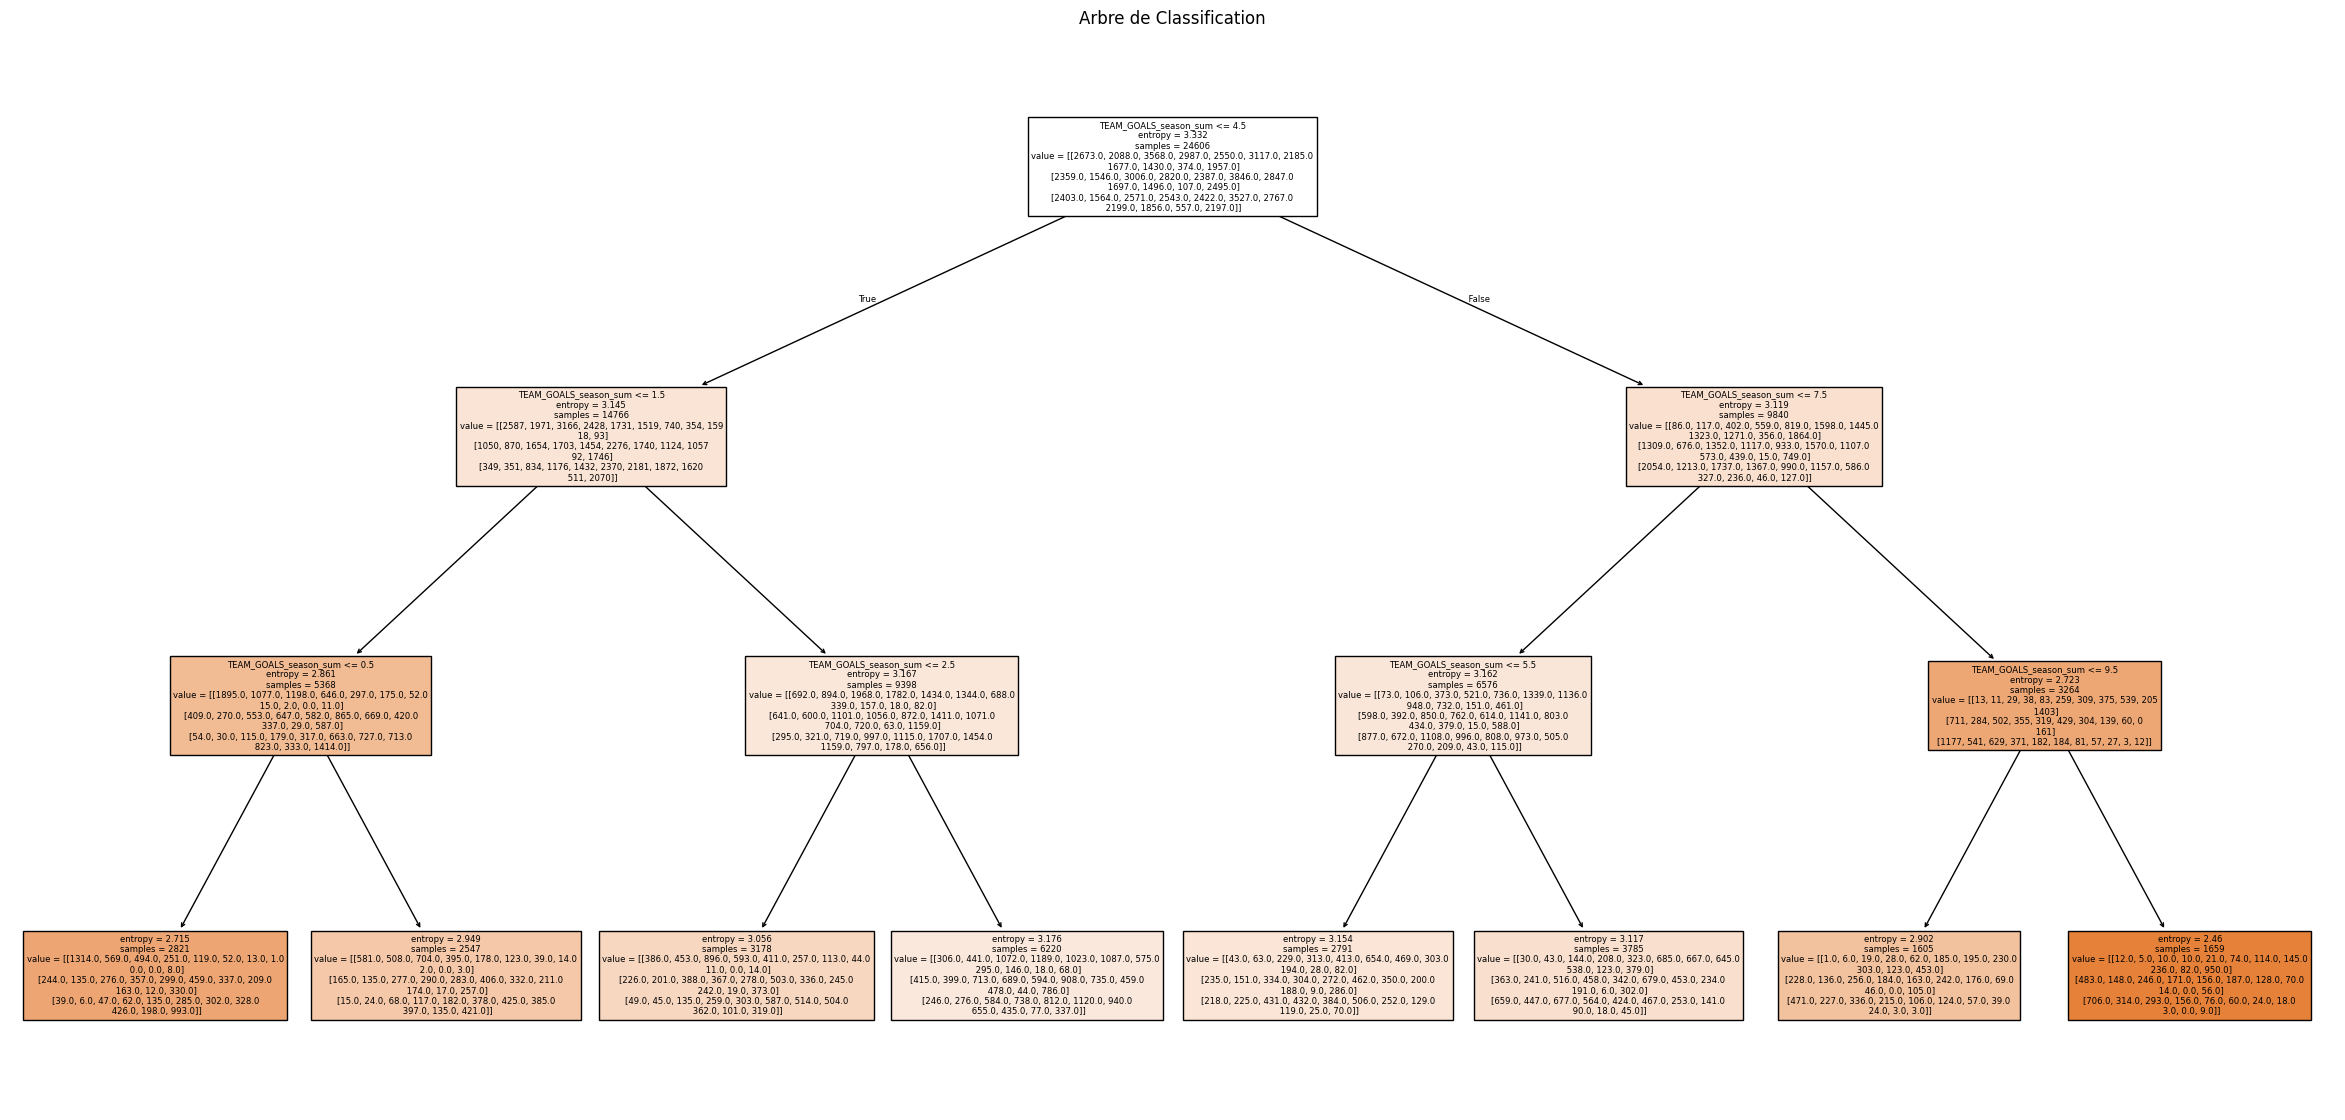

In [14]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_test_random)

# Prédictions avec l'arbre de classification
y_pred_clf = clf.predict(X_test)

# Visualiser l'arbre de classification
plt.figure(figsize=(30, 14))
plot_tree(clf, filled=True, feature_names=list(X_train.columns), class_names=['HOME_WINS', 'DRAW', 'AWAY_WINS'])
plt.title("Arbre de Classification")
plt.show()

JE vais faire  pour tous les informations necessaire

In [15]:
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(X_train, y_test_random)
y_pred_regr = regr.predict(X_test)


In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_test_random)
y_pred_lin = lin_reg.predict(X_test)

In [17]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_test_random)
y_pred_clf = clf.predict(X_test)

In [18]:
y_pred_regr_classes = np.argmax(y_pred_regr, axis=1)
# Pour l'arbre de classification (DecisionTreeClassifier)
y_pred_clf_classes = np.argmax(y_pred_clf, axis=1)

In [19]:
# les classes
classes = ['HOME_WINS', 'DRAW', 'AWAY_WINS']

# j'identifier l'équipe gagnante ou le match nul
def identify_winner(predictions):
    results = []
    for pred in predictions:
        if pred == 0:
            results.append("Équipe à domicile gagne")
        elif pred == 1:
            results.append("Match nul")
        else:
            results.append("Équipe à l'extérieur gagne")
    return results

y_pred_classes_lin = np.argmax(y_pred_lin, axis=1)  


results_regr = identify_winner(y_pred_regr_classes)  # Prédictions de l'arbre de régression
results_lin = identify_winner(y_pred_classes_lin)    # Prédictions de la régression linéaire
results_clf = identify_winner(y_pred_clf_classes)    # Prédictions de l'arbre de classification




In [20]:
def print_results(model_name, results):
    print(f"\n{'-'*50}")
    print(f"{model_name} - Résultats des 10 premières prédictions :")
    print(f"{'-'*50}")
    
    for i, result in enumerate(results[:10], 1):
        print(f"Prédiction {i}: {result}")
    
    print(f"{'-'*50}\n")


In [21]:
print_results("Arbre de Régression", results_regr)


--------------------------------------------------
Arbre de Régression - Résultats des 10 premières prédictions :
--------------------------------------------------
Prédiction 1: Équipe à l'extérieur gagne
Prédiction 2: Équipe à l'extérieur gagne
Prédiction 3: Équipe à domicile gagne
Prédiction 4: Équipe à domicile gagne
Prédiction 5: Match nul
Prédiction 6: Équipe à domicile gagne
Prédiction 7: Équipe à l'extérieur gagne
Prédiction 8: Équipe à l'extérieur gagne
Prédiction 9: Équipe à l'extérieur gagne
Prédiction 10: Équipe à domicile gagne
--------------------------------------------------



In [22]:
print_results("Régression Linéaire", results_lin)



--------------------------------------------------
Régression Linéaire - Résultats des 10 premières prédictions :
--------------------------------------------------
Prédiction 1: Équipe à l'extérieur gagne
Prédiction 2: Équipe à l'extérieur gagne
Prédiction 3: Équipe à domicile gagne
Prédiction 4: Équipe à domicile gagne
Prédiction 5: Équipe à l'extérieur gagne
Prédiction 6: Équipe à domicile gagne
Prédiction 7: Équipe à l'extérieur gagne
Prédiction 8: Équipe à l'extérieur gagne
Prédiction 9: Équipe à l'extérieur gagne
Prédiction 10: Équipe à domicile gagne
--------------------------------------------------



In [23]:
print_results("Arbre de Classification", results_clf)


--------------------------------------------------
Arbre de Classification - Résultats des 10 premières prédictions :
--------------------------------------------------
Prédiction 1: Équipe à l'extérieur gagne
Prédiction 2: Match nul
Prédiction 3: Équipe à domicile gagne
Prédiction 4: Équipe à domicile gagne
Prédiction 5: Match nul
Prédiction 6: Équipe à domicile gagne
Prédiction 7: Équipe à l'extérieur gagne
Prédiction 8: Équipe à l'extérieur gagne
Prédiction 9: Équipe à l'extérieur gagne
Prédiction 10: Équipe à domicile gagne
--------------------------------------------------



# Fichier csv submission

In [24]:

test_home_team = pd.read_csv("X_Test_Data/test_home_team_statistics_df.csv")
test_away_team = pd.read_csv("X_Test_Data/test_away_team_statistics_df.csv")


assert len(test_home_team) == len(test_away_team), "Les fichiers de test ont des longueurs différentes !"
X_test = pd.concat([test_home_team, test_away_team], axis=1)
test_ids = test_home_team["ID"]  



In [25]:
if len(y_pred_classes) != len(test_ids):
    y_pred_classes = y_pred_classes[:len(test_ids)] 

In [26]:
submission_data = pd.DataFrame({
    "ID": test_ids, 
    "HOME_WINS": y_pred_classes[:, 0].astype(int),
    "DRAW": y_pred_classes[:, 1].astype(int),
    "AWAY_WINS": y_pred_classes[:, 2].astype(int)
})

# Exporter le fichier
submission_file = "submission.csv"
submission_data.to_csv(submission_file, index=False)

print(f"Fichier '{submission_file}' généré avec succès !")

Fichier 'submission.csv' généré avec succès !
